In [1]:
import pandas as pd
import matplotlib.pyplot as plt

supermarket_df = pd.read_csv("./data/supermarket_sales.csv")
supermarket_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


## What is the average unit price and quantity of products purchased? 
## Is there a relationship between the unit price and the quantity purchased?

In [2]:
average_unit_price = supermarket_df['Unit price'].mean() 
average_unit_price

55.67212999999998

In [3]:
average_quantity_price = supermarket_df['Quantity'].mean() 
average_quantity_price

5.51

In [4]:
product_lines = supermarket_df['Product line'].unique().tolist()
product_lines

['Health and beauty',
 'Electronic accessories',
 'Home and lifestyle',
 'Sports and travel',
 'Food and beverages',
 'Fashion accessories']

In [5]:
average_product_price = supermarket_df.groupby('Product line')['Unit price'].mean()
average_product_price


Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64

In [6]:
average_product_quantity = supermarket_df.groupby('Product line')['Quantity'].mean()
average_product_quantity

Product line
Electronic accessories    5.711765
Fashion accessories       5.067416
Food and beverages        5.471264
Health and beauty         5.618421
Home and lifestyle        5.693750
Sports and travel         5.542169
Name: Quantity, dtype: float64

In [7]:
quantity_count = supermarket_df.groupby('Product line')['Quantity'].count()
quantity_count

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Quantity, dtype: int64

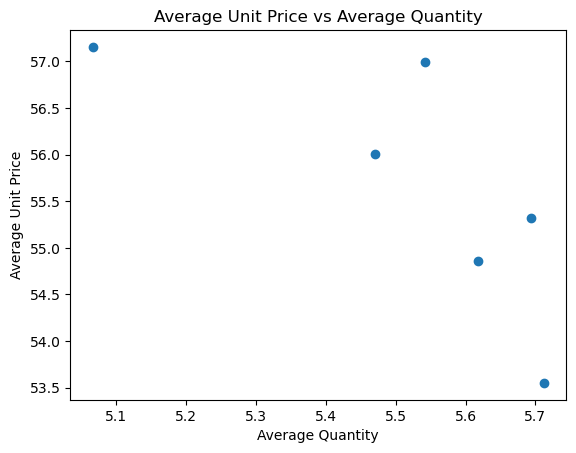

In [8]:
# Create a scatter plot
plt.scatter(average_product_quantity,average_product_price )

# Add labels and title
plt.xlabel("Average Quantity")
plt.ylabel("Average Unit Price")
plt.title("Average Unit Price vs Average Quantity")

# Show the plot
plt.show()


Text(0.5, 1.0, 'Average Unit Price vs Quantity')

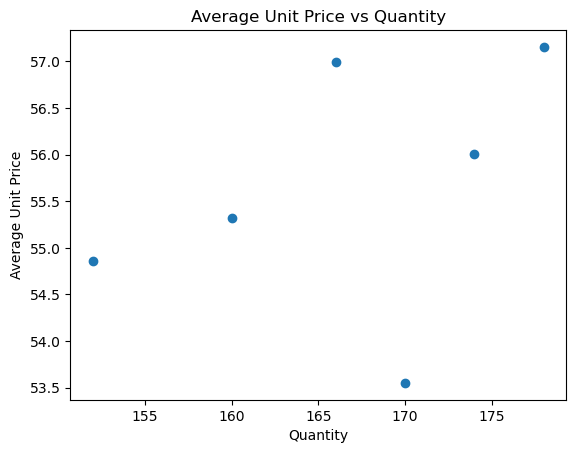

In [9]:
x_values = quantity_count
y_values = average_product_price
plt.scatter(x_values, y_values)
plt.xlabel('Quantity')
plt.ylabel('Average Unit Price')
plt.title("Average Unit Price vs Quantity")


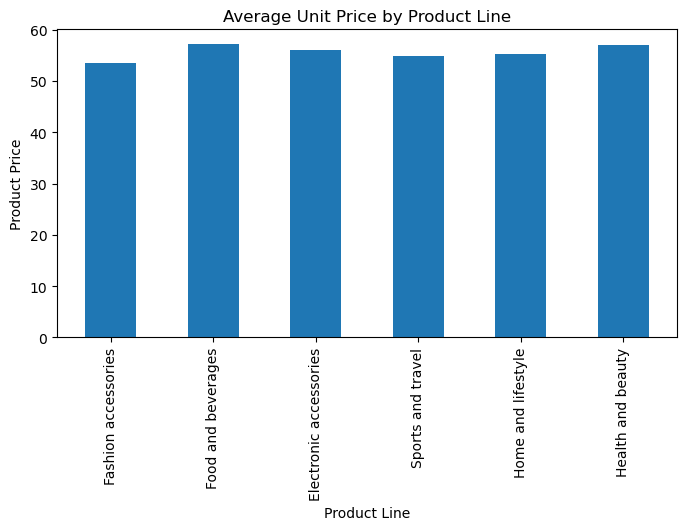

In [10]:
labels = supermarket_df['Product line'].value_counts().index
values = average_product_price

plt.figure(figsize=[8,4])
plt.xticks(rotation=90)
plt.bar(labels, values, width=0.5)
plt.xlabel('Product Line')
plt.ylabel('Product Price')
plt.title('Average Unit Price by Product Line')

plt.show()

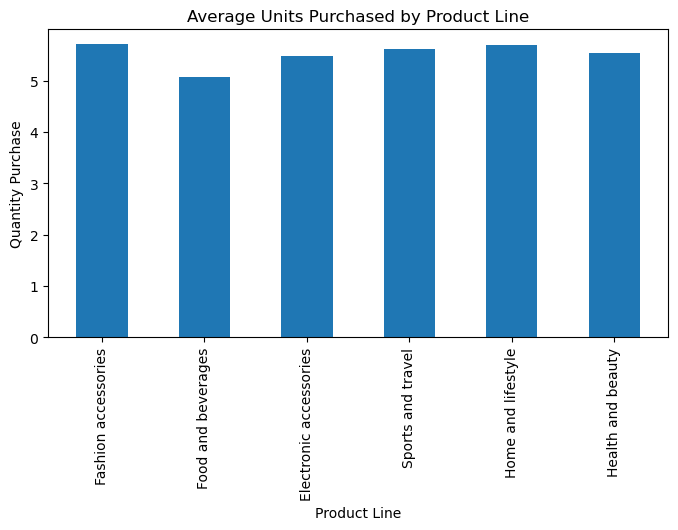

In [11]:
labels = supermarket_df['Product line'].value_counts().index
values = average_product_quantity

plt.figure(figsize=[8,4])
plt.xticks(rotation=90)
plt.bar(labels, values, width=0.5)
plt.xlabel('Product Line')
plt.ylabel('Quantity Purchase')
plt.title('Average Units Purchased by Product Line')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

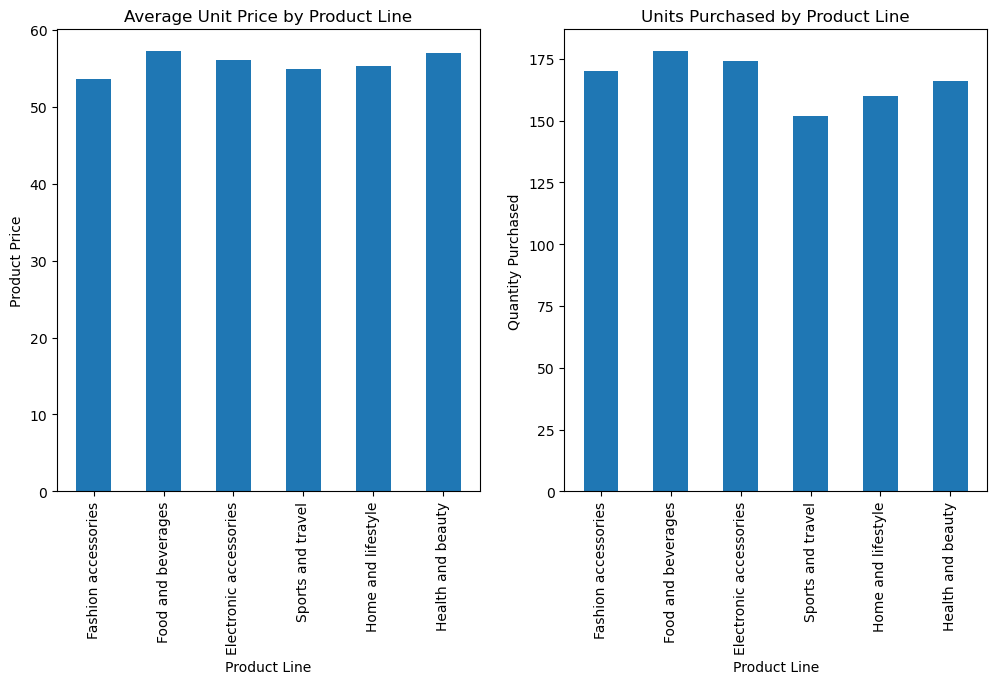

In [12]:
# Average product price labels
labels = supermarket_df['Product line'].value_counts().index
values = average_product_price

#Quantity labels
labels2 = supermarket_df['Product line'].value_counts().index
values2 = quantity_count

#Make the size of the chart
plt.figure(figsize=[12, 6])

#First bar chart: Average product price
plt.subplot(1, 2, 1) # Create a subplot for the first chart CHAT GPT GAVE ME THIS
plt.bar(labels, values, width=0.5)
plt.xlabel('Product Line')
plt.ylabel('Product Price')
plt.title('Average Unit Price by Product Line')
plt.xticks(rotation=90)

#Second bar chart: Quantity of products purchased
plt.subplot(1, 2, 2) # Create a subplot for the second chart CHAT GPT GAVE ME THIS
plt.bar(labels2, values2,width=0.5)
plt.xlabel('Product Line')
plt.ylabel('Quantity Purchased')
plt.title('Units Purchased by Product Line')
plt.xticks(rotation=90)

plt.show


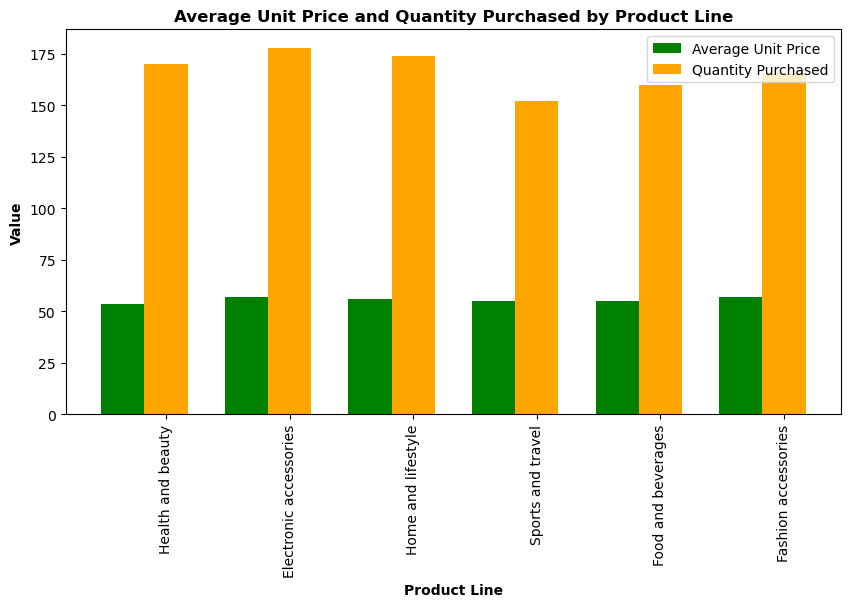

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Data
product_lines
average_product_price
quantity_count 

#Bar Width
bar_width = 0.35

# CHAT GPT DID THIS: Set the positions of the bars on the x-axis
r1 = np.arange(len(product_lines))
r2 = [x + bar_width for x in r1]

# CHAT GPT TOLD ME ABOUT THE r1 and r2
plt.figure(figsize=(10,5))
plt.bar(r1, average_product_price, color='green', width=bar_width, label='Average Unit Price')
plt.bar(r2, quantity_count, color='orange', width=bar_width, label='Quantity Purchased')

# Add xticks on the middle of the group bars
plt.xlabel('Product Line', fontweight='bold')
#CHAT GPT TOLD ME THIS
plt.xticks([r + bar_width for r in range(len(product_lines))], product_lines, rotation=90)

# Add y-axis label
plt.ylabel('Value', fontweight='bold')

# Add title
plt.title('Average Unit Price and Quantity Purchased by Product Line', fontweight='bold')

# Add legend
plt.legend()

# Show the plot
plt.show()


### What is the correlation between customer rating and total purchase amount? Is there a relationship between purchase time of day and customer rating?

In [14]:
supermarket_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [16]:
avg_spent_by_customer

Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64

Text(0.5, 1.0, 'total spent by rating')

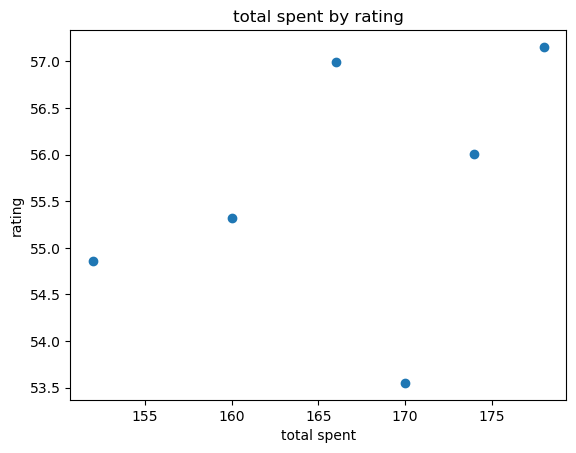

In [17]:
total_spent_by_customer = list(supermarket_df['Total'])

rating_by_customer = list(supermarket_df['Rating'])

plt.scatter(x_values, y_values)
plt.xlabel('total spent')
plt.ylabel('rating')
plt.title("total spent by rating")

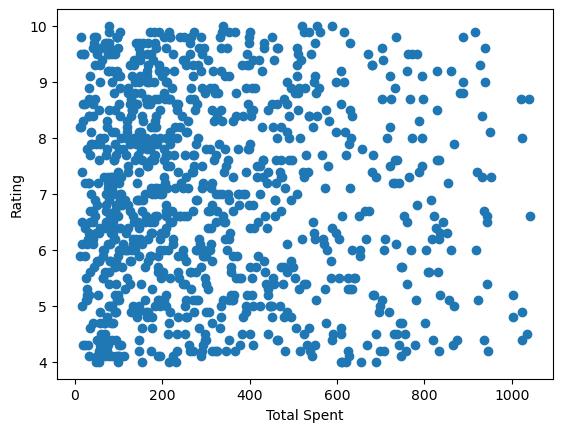

In [18]:
import matplotlib.pyplot as plt

# Get the 'Total' and 'Rating' columns as arrays
total = supermarket_df['Total'].values
rating = supermarket_df['Rating'].values

# Create a scatter plot
plt.scatter(total, rating)

# Add labels to the axes
plt.xlabel('Total Spent')
plt.ylabel('Rating')

# Show the plot
plt.show()


<BarContainer object of 1000 artists>

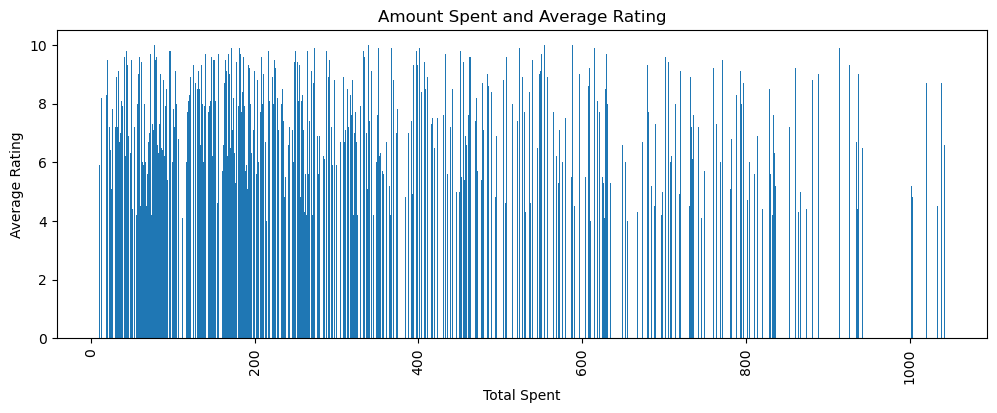

In [42]:
total = supermarket_df['Total'].values
rating = supermarket_df['Rating'].values

plt.figure(figsize=[12,4])
plt.xticks(rotation=90)
amount_spent_and_rating = plt.bar(total, rating, width=0.7)
plt.xlabel('Total Spent')
plt.ylabel('Average Rating')
plt.title('Amount Spent and Average Rating')

amount_spent_and_rating

In [15]:
# Group the data by customer ID and calculate the sum of their total amounts spent
avg_spent_by_customer = supermarket_df.groupby('Customer type')['Total'].mean()

# Group the data by customer ID and find the average rating given by each customer
avg_rating_by_customer = supermarket_df.groupby('Customer type')['Rating'].mean()

avg_rating_by_customer

Customer type
Member    6.940319
Normal    7.005210
Name: Rating, dtype: float64

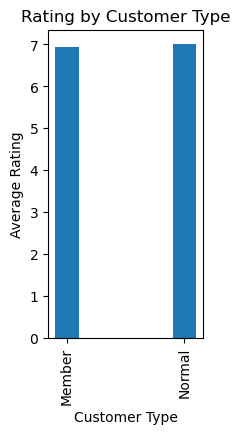

In [19]:
labels = supermarket_df['Customer type'].value_counts().index
values = avg_rating_by_customer

plt.figure(figsize=[2,4])
plt.xticks(rotation=90)
plt.bar(labels, values, width=0.2)
plt.xlabel('Customer Type')
plt.ylabel('Average Rating')
plt.title('Rating by Customer Type')
plt.show()

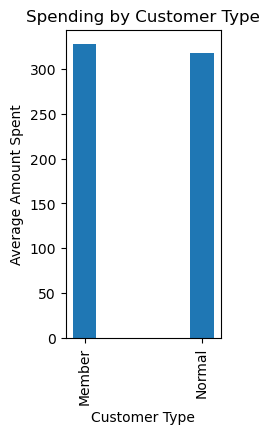

In [20]:
labels = supermarket_df['Customer type'].value_counts().index
values = avg_spent_by_customer

plt.figure(figsize=[2,4])
plt.xticks(rotation=90)
plt.bar(labels, values, width=0.2)
plt.xlabel('Customer Type')
plt.ylabel('Average Amount Spent')
plt.title('Spending by Customer Type')
plt.show()

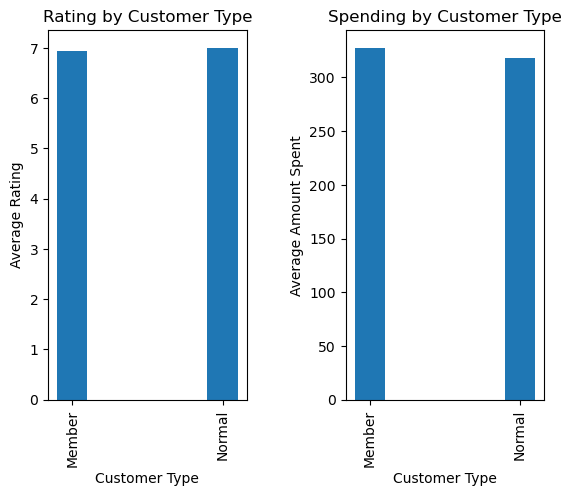

In [21]:
import matplotlib.pyplot as plt

# First chart: Rating by Customer Type
labels = supermarket_df['Customer type'].value_counts().index
values = avg_rating_by_customer

plt.subplot(1, 2, 1) # 1 row, 2 columns, plot 1
plt.xticks(rotation=90)
plt.bar(labels, values, width=0.2)
plt.xlabel('Customer Type')
plt.ylabel('Average Rating')
plt.title('Rating by Customer Type')

# Second chart: Spending by Customer Type
labels = supermarket_df['Customer type'].value_counts().index
values = avg_spent_by_customer

plt.subplot(1, 2, 2) # 1 row, 2 columns, plot 2
plt.xticks(rotation=90)
plt.bar(labels, values, width=0.2)
plt.xlabel('Customer Type')
plt.ylabel('Average Amount Spent')
plt.title('Spending by Customer Type')

# Adjust spacing between the plots
plt.subplots_adjust(wspace=0.5)

# Show the plots
plt.show()


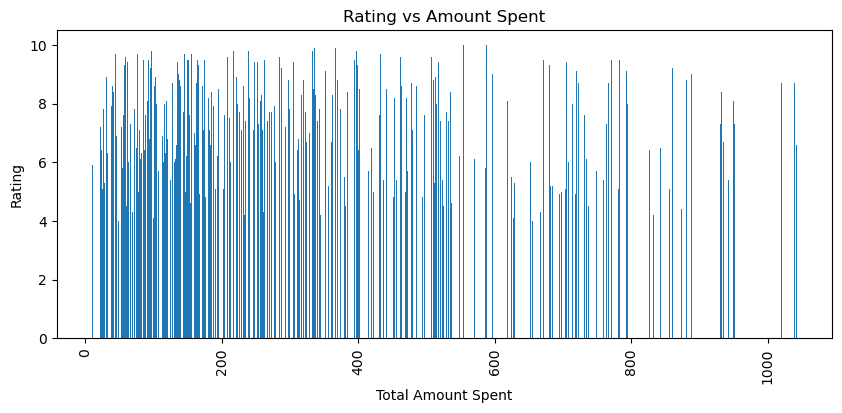

In [22]:
labels = total_spent_by_customer
values = rating_by_customer

plt.figure(figsize=[10,4])
plt.xticks(rotation=90)
plt.bar(labels, values, width=0.5)
plt.xlabel('Total Amount Spent')
plt.ylabel('Rating')
plt.title('Rating vs Amount Spent')
plt.show()

In [23]:
supermarket_df.groupby('Product line')['Rating'].mean()

Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64

In [24]:
supermarket_df['Time'] = pd.to_datetime(supermarket_df['Time']).dt.hour

time_bins = [10, 12, 14, 16, 18, 21]
labels = ['Morning 10-12', 'Midday 12-2', 'Afternoon 2-4', 'Early Evening 4-6', 'Evening 6-8']

# Assuming you have a DataFrame named 'supermarket_df' and a column named 'Time' with numeric time values

# Convert time values to integers
supermarket_df['Time'] = supermarket_df['Time'].astype(int)

# Apply binning to the numeric time values
supermarket_df['Time of Day'] = pd.cut(supermarket_df['Time'], bins=time_bins, labels=labels, right=False)

# Calculate the average rating by time of day
time_avg_rating = supermarket_df.groupby('Time of Day')['Rating'].mean()

# Print the average rating by time of day
time_avg_rating

Time of Day
Morning 10-12        6.960733
Midday 12-2          7.155208
Afternoon 2-4        6.902703
Early Evening 4-6    6.898675
Evening 6-8          6.941993
Name: Rating, dtype: float64

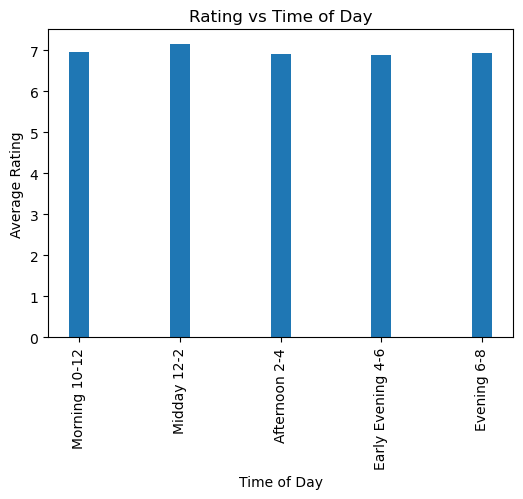

In [25]:
time_avg_rating
labels

# Calculate the average rating by time of day
time_avg_rating = supermarket_df.groupby('Time of Day')['Rating'].mean()

# Plot the bar graph
plt.figure(figsize=[6,4])
plt.xticks(rotation=90)

plt.bar(labels, time_avg_rating, width=0.2)

plt.xlabel('Time of Day')
plt.ylabel('Average Rating')
plt.title('Rating vs Time of Day')
plt.show()

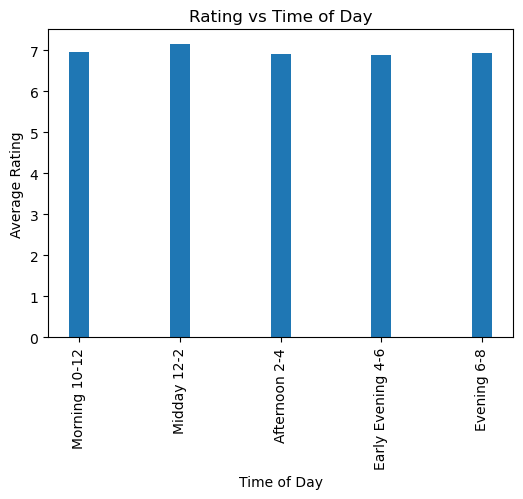

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

time_bins = [10, 12, 14, 16, 18, 21]
labels = ['Morning 10-12', 'Midday 12-2', 'Afternoon 2-4', 'Early Evening 4-6', 'Evening 6-8']

# Assuming you have a DataFrame named 'supermarket_df' and a column named 'Time' with numeric time values

# Convert time values to integers
supermarket_df['Time'] = supermarket_df['Time'].astype(int)

# Apply binning to the numeric time values
supermarket_df['Time of Day'] = pd.cut(supermarket_df['Time'], bins=time_bins, labels=labels, right=False)

# Calculate the average rating by time of day
time_avg_rating = supermarket_df.groupby('Time of Day')['Rating'].mean()

# Plot the bar graph
plt.figure(figsize=[6,4])
plt.xticks(rotation=90)
plt.bar(labels, time_avg_rating, width=0.2)
plt.xlabel('Time of Day')
plt.ylabel('Average Rating')
plt.title('Rating vs Time of Day')
plt.show()


## who rated 4 and below???

In [27]:
subset_df = supermarket_df[supermarket_df['Rating'] < 5]
pd.DataFrame(subset_df)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Time of Day
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18,Ewallet,597.73,4.761905,29.8865,4.1,Evening 6-8
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.8960,60.8160,2/6/2019,18,Ewallet,57.92,4.761905,2.8960,4.5,Evening 6-8
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16,Cash,562.32,4.761905,28.1160,4.5,Early Evening 4-6
16,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,3/11/2019,11,Credit card,482.51,4.761905,24.1255,4.6,Morning 10-12
19,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.0300,84.6300,3/11/2019,15,Ewallet,80.60,4.761905,4.0300,4.4,Afternoon 2-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,764-44-8999,B,Mandalay,Normal,Female,Health and beauty,14.76,2,1.4760,30.9960,2/18/2019,14,Ewallet,29.52,4.761905,1.4760,4.3,Afternoon 2-4
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,3/29/2019,19,Ewallet,823.40,4.761905,41.1700,4.3,Evening 6-8
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19,Credit card,282.80,4.761905,14.1400,4.5,Evening 6-8
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17,Ewallet,973.80,4.761905,48.6900,4.4,Early Evening 4-6


In [28]:
mean_rating_by_gender = subset_df.groupby('Date')['Rating'].mean()
print(mean_rating_by_gender)

Date
1/1/2019     4.300
1/10/2019    4.900
1/11/2019    4.700
1/12/2019    4.400
1/14/2019    4.300
             ...  
3/30/2019    4.300
3/4/2019     4.400
3/5/2019     4.225
3/7/2019     4.400
3/9/2019     4.200
Name: Rating, Length: 73, dtype: float64


In [29]:
# Convert the 'Date' column to datetime
supermarket_df['Date'] = pd.to_datetime(supermarket_df['Date'])

# Extract the day of the week
supermarket_df['Day of Week'] = supermarket_df['Date'].dt.day_name()

# Filter the DataFrame for bad ratings (e.g., ratings less than a certain threshold)
threshold = 5.0
bad_ratings_df = supermarket_df[supermarket_df['Rating'] < threshold]

# Calculate the average rating for each day of the week
average_rating_by_day = bad_ratings_df.groupby('Day of Week')['Rating'].mean()

# Print the average rating by day of the week
print(average_rating_by_day)


Day of Week
Friday       4.445000
Monday       4.520000
Saturday     4.364286
Sunday       4.313636
Thursday     4.516667
Tuesday      4.462963
Wednesday    4.466667
Name: Rating, dtype: float64


In [30]:
bad_ratings_df.groupby('Product line')['Rating'].mean()

Product line
Electronic accessories    4.496154
Fashion accessories       4.485185
Food and beverages        4.366667
Health and beauty         4.425000
Home and lifestyle        4.464516
Sports and travel         4.342857
Name: Rating, dtype: float64

In [31]:
bad_ratings_df.groupby('Payment')['Rating'].mean()

Payment
Cash           4.391304
Credit card    4.436538
Ewallet        4.470909
Name: Rating, dtype: float64

In [32]:
supermarket_df.groupby('Total')['Rating'].mean()

Total
10.6785      5.9
12.6945      8.2
13.1670      8.2
13.4190      9.5
14.6790      9.8
            ... 
1022.4900    4.4
1023.7500    8.0
1034.4600    4.5
1039.2900    8.7
1042.6500    6.6
Name: Rating, Length: 990, dtype: float64